# 붓꽃 분류

## 패키지 로딩

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd

## 데이터 로딩 및 분리

In [2]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10, stratify=y)

## 모델 생성 및 학습

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## 예측 및 평가

In [6]:
y_hat = knn.predict(x_test)
print(f'정확도:{metrics.accuracy_score(y_test,y_hat):.3f}')

정확도:1.000


## 최적의 k 찾기

In [11]:
k = 10
acc_scores = np.zeros(k)
for k in range(1, k+1):
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    y_hat = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_hat)
    acc_scores[k-1] = acc
print(acc_scores)
print(f'최적의 k는 {np.argmax(acc_scores)+1}이며, 정확도는 {acc_scores[np.argmax(acc_scores)]:.3f}이다.')

[1.         1.         1.         0.96666667 1.         1.
 1.         1.         1.         0.96666667]
최적의 k는 1이며, 정확도는 1.000이다.


# MNIST 손글씨 분류
- MNIST(Modified National Institute of Standards and Technology)

## 데이터 로딩
- fetch_openml: 데이터 및 실험을 위해 공개 저장소인 openml.org에서 공개 데이터 셋을 가져온다.

In [2]:
from sklearn.datasets import fetch_openml
import ssl

ssl._create_default_https_context = ssl._create_default_https_context
mnist = fetch_openml('mnist_784', version=1, parser='pandas')
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


# 데이터 모양 확인
- 전체 7만개의 손글씨 이미지 데이터
- 총 784개의 특성값을 갖는다()

In [6]:
x = mnist.data
y = mnist.target
print(x.shape,y.shape)
print(x.head(1))
print(x.iloc[0].values.reshape((28,28)))

(70000, 784) (70000,)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  

[1 rows x 784 columns]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 

## 숫자 데이터 이미지 시각화

5


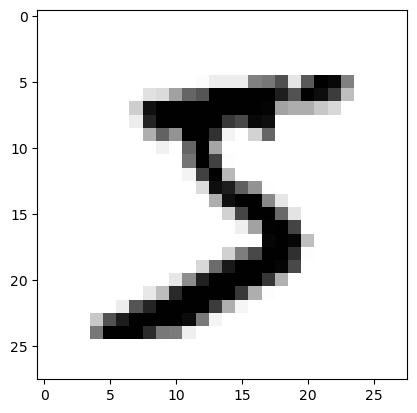

In [11]:
import matplotlib.pyplot as plt
data = x.iloc[0].values.reshape((28,28))
target = y[0]
print(target)
plt.imshow(data, cmap='binary')
plt.show()

## 학습 데이터/평가 데이터 분리

In [ ]:
- MNIST 데이터셋은 앞쪽 6만개는 학습데이터로 뒤쪽 만개는 평가데이터로 사용하도록 나뉘어 있다

In [12]:
x_train, x_test, y_train, y_test = x[:60000],x[6000:],y[:60000],y[6000:]

# 모델 생성 및 학습

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# 예측 및 평가

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_hat = knn.predict(x_test)
print(f'정확도:{accuracy_score(y_test,y_hat):.3f}')
print(f'AUC:{roc_auc_score(y_test,knn.predict_proba(x_test),multi_class="ovo")}')

정확도:0.984
AUC:0.998850903515275


In [17]:
print(knn.predict(data.reshape(1,-1)))

['5']


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
import numpy as np
from PIL import Image

image = Image.open('1.png')
image = image.convert('L') #흑백으로
img_ndarray = np.array(image)
img_ndarray = np.where(img_ndarray == 255,0,255-img_ndarray)

print(knn.predict(img_ndarray.reshape(1,-1)))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['4']
